# 第6章: 英語テキストの処理
英語のテキスト（[nlp.txt](data/nlp.txt)）に対して，以下の処理を実行せよ．

### wgetには-ncコマンド（上書き防止）をつけよう

In [1]:
!wget -nc http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt -P ./data/

ファイル `./data/nlp.txt' はすでに存在するので、取得しません。



In [2]:
!head ./data/nlp.txt

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

###  先読み後読み？
横井さんの : https://io-lab.esa.io/posts/450

ネットの : https://abicky.net/2010/05/30/135112/

In [3]:
import re

def sent_generator(f):
    for line in f:
        for sent in re.split(r'(?<=[.:;?!])\s+(?=[A-Z])', line.rstrip()):   # "\s"よりも"\s+"の方が綺麗ではないテキストにも対応できる．
            if sent: yield sent

In [4]:
"""
from itertools import islice

with open('./data/nlp.txt', 'r') as f:
    for sent in islice(sent_generator(f), 5):
        print(sent)
"""

"\nfrom itertools import islice\n\nwith open('./data/nlp.txt', 'r') as f:\n    for sent in islice(sent_generator(f), 5):\n        print(sent)\n"

In [5]:
with open('./data/nlp.txt', 'r') as f:
    with open('./work/q50.txt', 'w') as fw:
        for sent in sent_generator(f):
            fw.write(sent+'\n')

In [6]:
!head -5 ./work/q50.txt

Natural language processing
From Wikipedia, the free encyclopedia
Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.


↑"Natural language processing", "From Wikipedia, the free encyclopedia"は，splitの正規表現にマッチせずそのまま出てくる

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [7]:
with open('./work/q50.txt', 'r') as f:
    with open('./work/q51.txt', 'w') as fw:
        for line in f:
            for word in line.split():
                fw.write(word.strip(',.?!"') + '\n')
            fw.write('\n')

In [8]:
!head -20 ./work/q51.txt

Natural
language
processing

From
Wikipedia
the
free
encyclopedia

Natural
language
processing
(NLP)
is
a
field
of
computer
science


## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ．
Pythonでは，Porterのステミングアルゴリズムの実装として[stemming](https://pypi.python.org/pypi/stemming)モジュールを利用するとよい．

#### 【python】nltkで英語のStemmingとLemmatization : https://hayataka2049.hatenablog.jp/entry/2018/03/25/203836

In [9]:
from nltk.stem.porter import PorterStemmer as PS
from itertools import islice

ps = PS()
with open('./work/q51.txt', 'r') as f:
    for word in islice(f, 10):
        print(word.rstrip()+'\t'+ps.stem(word), end='')

Natural	natural
language	language
processing	processing
	
From	from
Wikipedia	wikipedia
the	the
free	free
encyclopedia	encyclopedia
	


## 53. Tokenization
[Stanford Core NLP](http://nlp.stanford.edu/software/corenlp.shtml)を用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [10]:
%%bash
/Users/kitayama/CoreNLP/stanford-corenlp-full-2018-02-27/corenlp.sh -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file ./data/nlp.txt -outputDirectory ./work/

Process is terminated.


### xml.etree.ElementTree
https://docs.python.jp/3/library/xml.etree.elementtree.html

In [20]:
!atom work/nlp.txt.xml

In [10]:
!head -30 work/nlp.txt.xml

In [11]:
import xml.etree.ElementTree as ET
from itertools import islice

tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

for word in islice(root.iter('word'), 20):   # Element.iter()  : 配下 (その子ノードや孫ノードなど) の部分木全体を再帰的にイテレートする
    if not word.text in (',', '.'):
        print(word.text)   #text化？

Natural
language
processing
From
Wikipedia
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer


## 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [12]:
import xml.etree.ElementTree as ET
from itertools import islice

tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

print('word\tlemma\tPOS\n')
for token in islice(root.iter('token'), 20):
    if not token[0].text in (',', '.'):
        print("{}\t{}\t{}".format(token[0].text, token[1].text, token[4].text))

word	lemma	POS

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
-LRB-	-lrb-	-LRB-
NLP	nlp	NN
-RRB-	-rrb-	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN


## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [13]:
# 人名どうやってとる？？？
import xml.etree.ElementTree as ET

tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

for token in root.findall('.//token[NER="PERSON"]'):   # <NER>PERSON</NER>のとこを取ってるっぽい
    print(token[0].text)

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


In [14]:
#  栗林さん
import xml.etree.ElementTree as ET
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

list_persons = []
person = ""
previous_offset_end = 0

for token in root.findall(".//token[NER='PERSON']"): 
    current_offset_start = int(token.find("CharacterOffsetBegin").text)
    
    #前の単語と隣接していたら、personにconcatしていく
    if current_offset_start == previous_offset_end + 1:
        person = person + " " + token.find("word").text
    
    #そうでなければ、personをlist_personsに追加
    #personを新たなtokenで上書き
    else:
        if person:
            list_persons.append(person)
        person = token.find("word").text

    previous_offset_end = int(token.find("CharacterOffsetEnd").text)
    
if person:
    list_persons.append(person)
        
print(list_persons)

['Alan Turing', 'Joseph Weizenbaum', 'MARGIE', 'Schank', 'Wilensky', 'Meehan', 'Lehnert', 'Carbonell', 'Lehnert', 'Racter', 'Jabberwacky', 'Moore']


####  ~~↑他の文章の人名とconcatされることはない？？~~
#### CharacterOffsetBegin/Endは文章が変わってもどんどん足されていくから，問題ない

In [15]:
# findいらないと思って変えてみたけど読みづらくなった
import xml.etree.ElementTree as ET

tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

persons_list = []
person = ''
previous_offset_end = 0

for token in root.findall('.//token[NER="PERSON"]'):
    current_offset_start = int(token[2].text)
    
    if current_offset_start == previous_offset_end + 1:
        person = person + ' ' + token[0].text
    
    else:
        if person:
            persons_list.append(person)
        person = token[0].text

    previous_offset_end = int(token[3].text)
    
if person:
    persons_list.append(person)
        
print(persons_list)

['Alan Turing', 'Joseph Weizenbaum', 'MARGIE', 'Schank', 'Wilensky', 'Meehan', 'Lehnert', 'Carbonell', 'Lehnert', 'Racter', 'Jabberwacky', 'Moore']


#### findallはリストで全部取ってきちゃうから，iterfindの方がいいかも

In [16]:
import xml.etree.ElementTree as ET
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

list_persons = []
person = ""
previous_offset_end = 0

for token in root.iterfind(".//token[NER='PERSON']"): 
    current_offset_start = int(token.find("CharacterOffsetBegin").text)
    
    if current_offset_start == previous_offset_end + 1:
        person = person + " " + token.find("word").text
    
    else:
        if person:
            list_persons.append(person)
        person = token.find("word").text

    previous_offset_end = int(token.find("CharacterOffsetEnd").text)
    
if person:
    list_persons.append(person)
        
print(list_persons)

['Alan Turing', 'Joseph Weizenbaum', 'MARGIE', 'Schank', 'Wilensky', 'Meehan', 'Lehnert', 'Carbonell', 'Lehnert', 'Racter', 'Jabberwacky', 'Moore']


## 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

### 素人?の言語処理100本ノック:56
https://qiita.com/segavvy/items/0340d3d71c9151265bcb

In [17]:
"""
# 中身よく分かんない＼(*^◯^*)／
import xml.etree.ElementTree as ET

tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

for coref in root.findall('.//coreference/coreference'):
    rep_mention = coref.find("*[@representative='true']")
    print(rep_mention[0].text)
    print(rep_mention[1].text)
    print(rep_mention[2].text)
    print(rep_mention[3].text)
    print(rep_mention[4].text)
    print()
"""

'\n# 中身よく分かんない＼(*^◯^*)／\nimport xml.etree.ElementTree as ET\n\ntree = ET.parse(\'work/nlp.txt.xml\')\nroot = tree.getroot()\n\nfor coref in root.findall(\'.//coreference/coreference\'):\n    rep_mention = coref.find("*[@representative=\'true\']")\n    print(rep_mention[0].text)\n    print(rep_mention[1].text)\n    print(rep_mention[2].text)\n    print(rep_mention[3].text)\n    print(rep_mention[4].text)\n    print()\n'

In [38]:
!grep -A 20 '<coreference>' work/nlp.txt.xml | head -30























--









In [41]:
#  栗林さん式改
import xml.etree.ElementTree as ET
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

for coref in root.findall('document/coreference/coreference'):
    rep_mention = coref.find("*[@representative='true']")   # coreferenceの子要素のうち，representative='true'のもの全て
    for mention in coref:
        word_list = mention.find('text').text.split()
        word_start, word_end = word_list[0], word_list[-1]
        i_sent, i_start, i_end = mention.find('sentence').text, mention.find('start').text, str(int(mention.find('end').text)-1)
        
        # "参照表現の最初の単語" を "[代表参照表現] (参照表現の最初の単語" に置き換える
        # "参照表現の最後の単語" を "参照表現の最後の単語)"に置き換える
        
        root.find(".//sentence[@id='{}']/tokens/token[@id='{}']".format(i_sent, i_start)).find('word').text \
        = " [" + rep_mention.find('text').text + "](" + word_start
        root.find(".//sentence[@id='{}']/tokens/token[@id='{}']".format(i_sent, i_end)).find('word').text \
        = root.find(".//sentence[@id='{}']/tokens/token[@id='{}']".format(i_sent, i_end)).find('word').text + ")"

with open('work/nlp_coreferene.txt', 'w') as f:
    for sent in root.iter('sentence'):
        for word in sent.iter('word'):
            f.write(word.text + " ")
        f.write("\n")

In [44]:
!sed -E "s/\s(\W)/\1/g" work/nlp_coreferene.txt | head -5

Natural language processing From Wikipedia, [the free encyclopedia Natural language processing-LRB- NLP-RRB-](the free encyclopedia Natural language processing-LRB- NLP-RRB-) is [the free encyclopedia Natural language processing-LRB- NLP-RRB-](a field of computer science), artificial intelligence, and linguistics concerned with the interactions between [computers](computers) and human-LRB- natural-RRB- languages. 
As such, NLP is related to the area of humani-computer interaction. 
Many challenges in NLP involve natural language understanding, that is, enabling [computers](computers) to derive meaning from human or natural language input, and others involve natural language generation. 
History The history of [NLP](NLP) generally starts in the 1950s, although work can be found from earlier periods. 
In 1950, [Alan Turing](Alan Turing) published an article titled`` Computing Machinery and Intelligence'' which proposed what is now called the [Alan Turing](Turing) test as a criterion of i

## 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木を[DOT言語](http://ja.wikipedia.org/wiki/DOT%E8%A8%80%E8%AA%9E)に変換し，[Graphviz](http://www.graphviz.org/)を用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，[pydot](https://code.google.com/p/pydot/)を使うとよい．

In [46]:
!grep -A 20 'collapsed-dependencies' work/nlp.txt.xml | head -30






















--








grep: write error: Broken pipe


### graphviz
https://qiita.com/shimo_t/items/b761973805f2cf0b2967

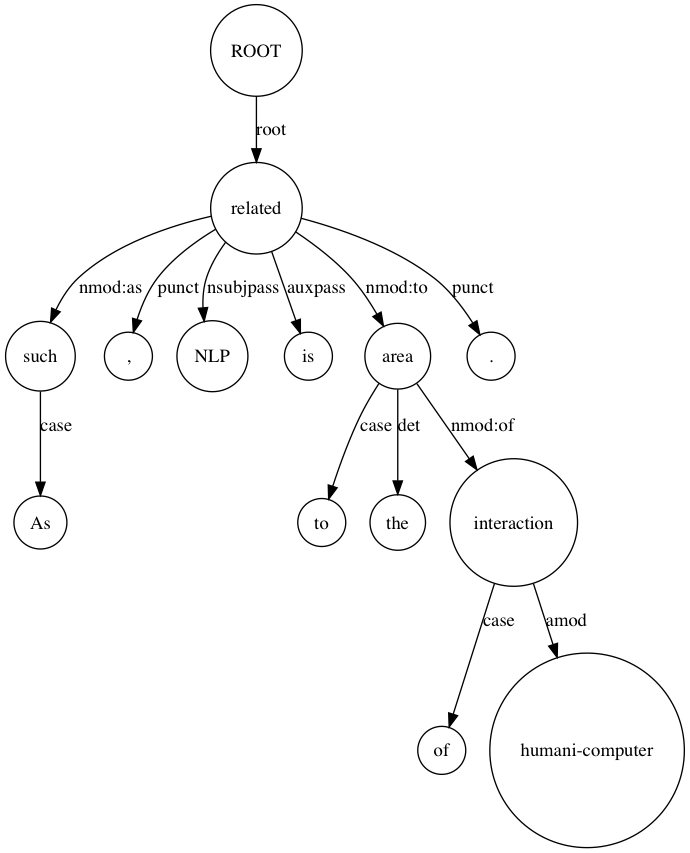

In [3]:
from graphviz import Digraph
import xml.etree.ElementTree as ET
from IPython.display import Image, display_png

def display_dependency_tree(i_sent, root):
    G = Digraph(format='png')
    G.attr('node', shape='circle')
    G.node('0', 'ROOT')
    # root = tree.getroot()
    for col_dep in root.iterfind(".//sentence[@id='{}']/dependencies[@type='collapsed-dependencies']/dep".format(i_sent)):
        
        gov, dep = col_dep.find('governor'), col_dep.find('dependent')
        
        #idxで処理すること
        G.node(dep.get('idx'), dep.text)
        G.edge(gov.get('idx'), dep.get('idx'), label = col_dep.get("type"))
        
    # G.render("work/q57")
    display_png(Image("./work/q57.png"))

    
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

display_dependency_tree(2, root)

## 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

+ 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
+ 主語: 述語からnsubj関係にある子（dependent）
+ 目的語: 述語からdobj関係にある子（dependent）

In [66]:
def print_dep_triple(XML_PATH):
    tree = ET.parse(XML_PATH)
    root = tree.getroot()
    
    for dependencies_in_sent in root.iterfind(".//dependencies[@type='collapsed-dependencies']"):
        
        dep_n = [(dep_nsubj.find('governor'), dep_nsubj.find('dependent')) for dep_nsubj in dependencies_in_sent.iterfind(".//dep[@type='nsubj']")]
        
        dep_d = [(dep_dobj.find('governor'), dep_dobj.find('dependent')) for dep_dobj in dependencies_in_sent.iterfind(".//dep[@type='dobj']")]
        
        for triple in search_triple(dep_n, dep_d):
            print("{}\t{}\t{}".format(triple[0], triple[1], triple[2]))
        

def search_triple(dep_n, dep_d):
    for tuple_n in dep_n:
        for tuple_d in dep_d:
            
            #親が同じだったらペアにして返す
            if tuple_n[0].get('idx') == tuple_d[0].get('idx'):
                yield (tuple_n[1].text, tuple_n[0].text, tuple_d[1].text)

print_dep_triple('work/nlp.txt.xml')

understanding	enabling	computers
others	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
patient	exceeded	base
ELIZA	provide	response
which	structured	information
underpinnings	discouraged	sort
that	underlies	approach
Some	produced	systems
which	make	decisions
systems	rely	which
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
Automatic	make	use
that	make	decisions


## 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [30]:
!grep -A 5 '<parse>' work/nlp.txt.xml | head -20







--






--






grep: write error: Broken pipe


In [26]:
#　田上さん改
from itertools import islice
from nltk.tree import Tree

import xml.etree.ElementTree as ET
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

for i, parse in enumerate(root.iterfind('.//parse')):
    if i < 3:
        print('Sentence No.{}'.format(i))
        print('--------------------')
        for subtree in Tree.fromstring(parse.text).subtrees():
            # print(subtree)
            if subtree.label() == 'NP': print(' '.join(subtree.leaves()))
        print()

Sentence No.0
--------------------
Natural language processing
Wikipedia
the free encyclopedia Natural language processing -LRB- NLP -RRB-
the free encyclopedia Natural language processing
NLP
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science
a field
computer science
artificial intelligence
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
linguistics
the interactions between computers and human -LRB- natural -RRB- languages
the interactions
computers and human -LRB- natural -RRB- languages
computers
human -LRB- natural -RRB- languages

Sentence No.1
--------------------
such
NLP
the area of humani-computer interaction
the area
humani-computer interaction

Sentence No.2
--------------------
Many challenges in NLP
Many challenges
NLP
natural language understanding , that is ,
natural language under

#### 藤井さんのスタック使ったverも（そのうち）実装しよう...